# Import Data

First date of training dataset:  2010-01-04 00:00:00
Last date of training dataset:  2019-02-08 00:00:00
len of training dataset:  2291

First date of validation dataset:  2019-02-11 00:00:00
Last date of validation dataset:  2021-09-14 00:00:00
len of validation dataset:  654

First date of test dataset:  2021-09-15 00:00:00
Last date of test dataset:  2022-12-30 00:00:00
len of test dataset:  327

total dataset lenght:  3272
sum of the three datasets:  3272
original returns dataframe dimension: (3272, 3)


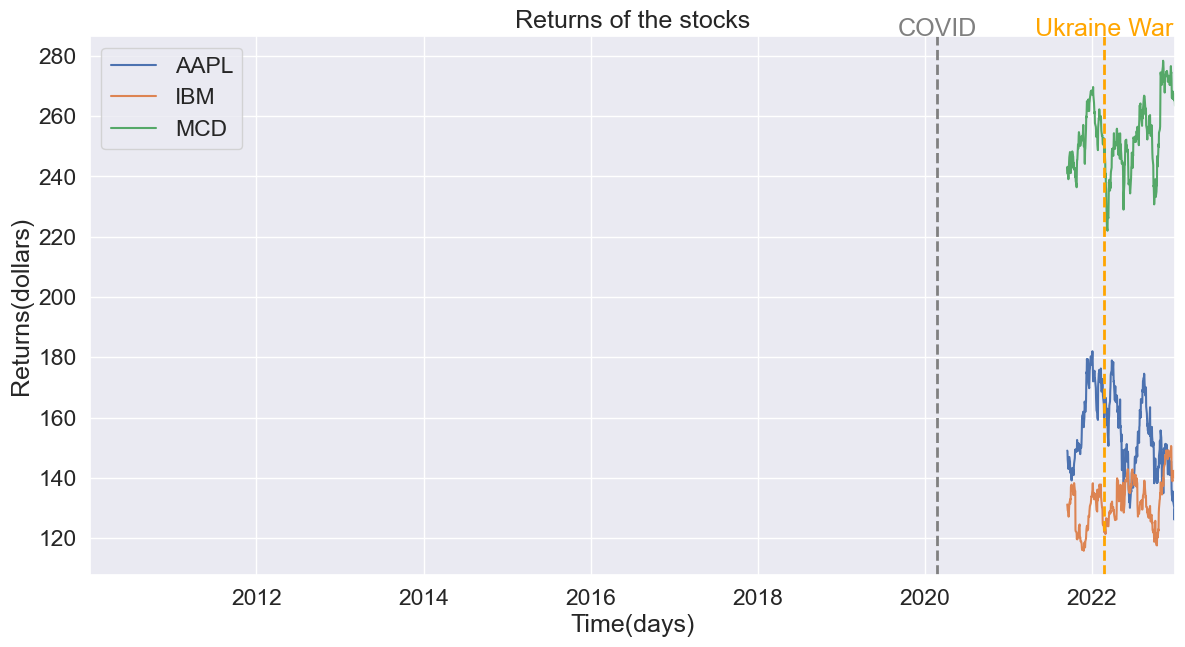

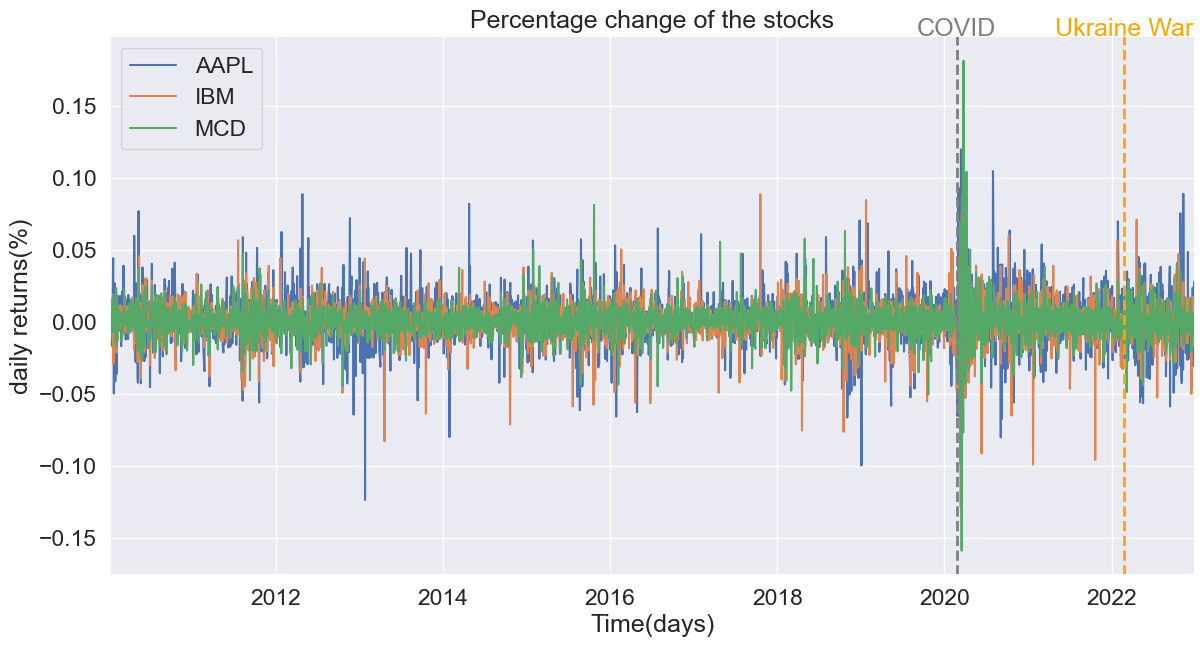

2010-01-04 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-05 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-06 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-07 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-08 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
dimension of the prescient dictionary: 3272
2010-01-04 00:00:00
          7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0

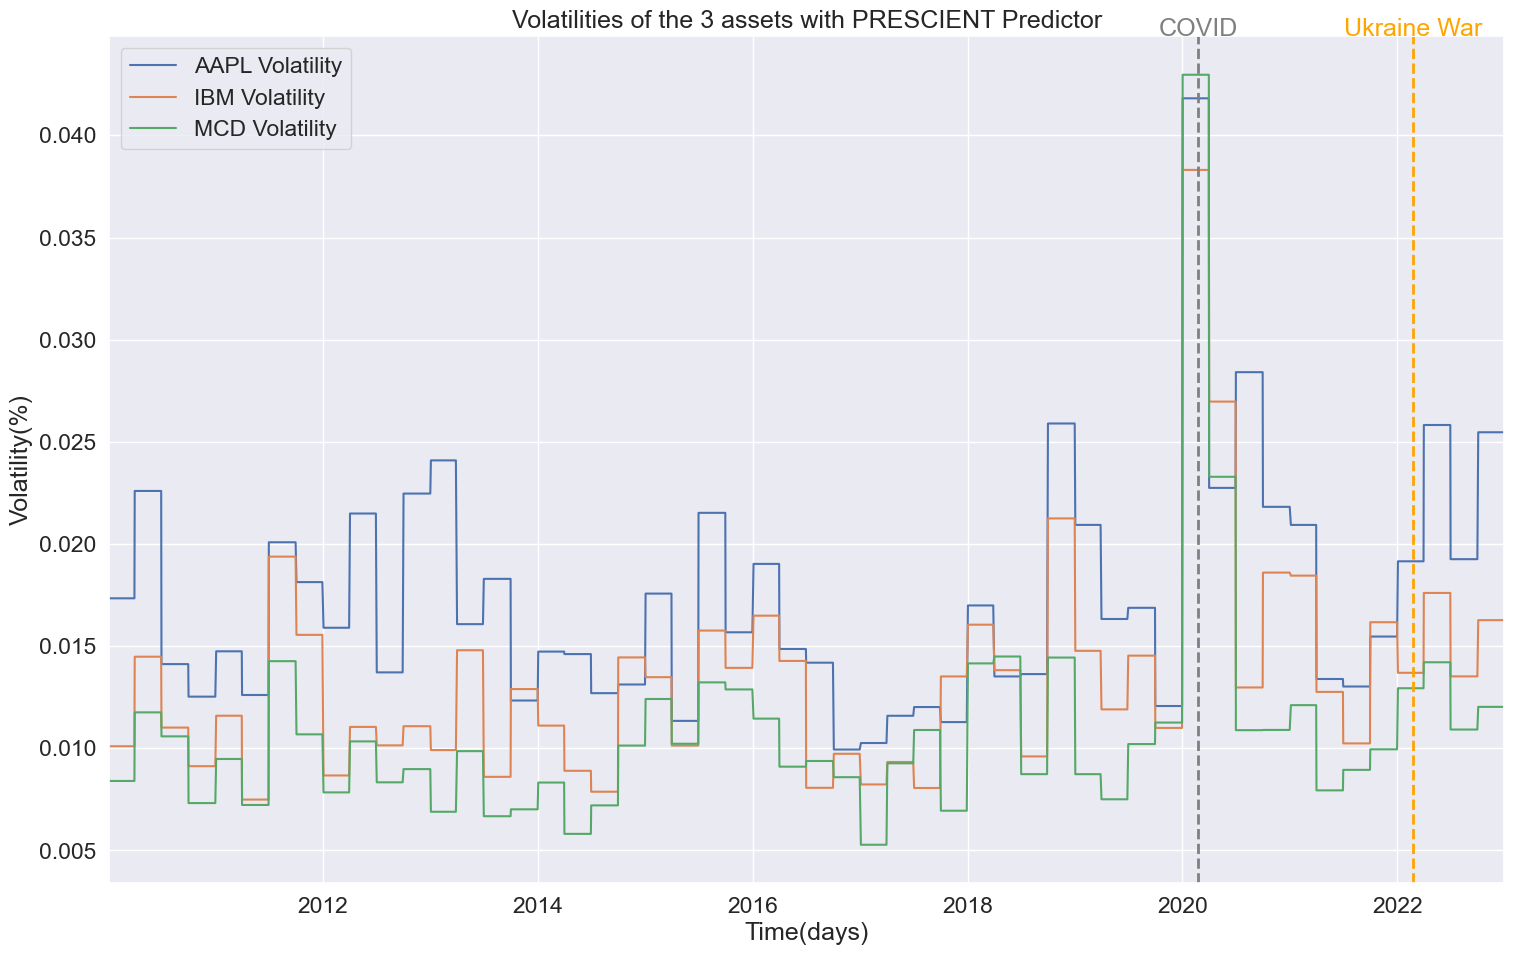

In [1]:
from cvx.covariance.ewma import iterated_ewma, _ewma_cov, _ewma_mean
from cvx.covariance.combination import from_sigmas

from predictorStarter import * # this file contains the import of every dataset, libraries needed and the initial plotting of the data
from predictorsImplementation import * # this file contains the implementation of the predictors ( one function implementation for each predictor)

import cvxpy as cp
from pandas.tseries.offsets import BDay

recover the list of volatilities, log likelihood, regret ecc

In [2]:
# these are all dictionaries that contain the volatility predictions for each predictor; every dictionaries contains the volatility predcitions for each stock(AAPL,IBM,MCD)

%store -r rw_volatilities
%store -r ewma_volatilities
%store -r mgarch_volatilities
%store -r hybrid_rw_volatilities
%store -r hybrid_ewma_volatilities
%store -r hybrid_mgarch_volatilities
%store -r real_volatilities

print("shape of volatilies: ", len(rw_volatilities['AAPL']))
# print the whole first element of the dictionary
print("the first element of the dictionary is: ", next(iter(rw_volatilities['AAPL'])))

# assert that every dictionaries have the same length
assert len(rw_volatilities['AAPL']) == len(ewma_volatilities['AAPL']) == len(mgarch_volatilities['AAPL']) == len(hybrid_rw_volatilities['AAPL']) == len(hybrid_ewma_volatilities['AAPL']) == len(hybrid_mgarch_volatilities['AAPL']) == len(real_volatilities['AAPL'])

print("length of the dictionary is: ", rw_volatilities)

# assert that the keys of the dictionaries are the same
assert rw_volatilities.keys() == ewma_volatilities.keys() == mgarch_volatilities.keys() == hybrid_rw_volatilities.keys() == hybrid_ewma_volatilities.keys() == hybrid_mgarch_volatilities.keys() == real_volatilities.keys()

print("keys of the dictionary are: ", rw_volatilities.keys())

# assert that every key of the dictionary has 308 elements
for key in rw_volatilities.keys():
    assert len(rw_volatilities[key]) == len(ewma_volatilities[key]) == len(mgarch_volatilities[key]) == len(hybrid_rw_volatilities[key]) == len(hybrid_ewma_volatilities[key]) == len(hybrid_mgarch_volatilities[key]) == len(real_volatilities[key])

print("shape of the dictionary is: ", len(rw_volatilities['AAPL']))

# assert that every key of every dictionary starts with the same timestamp
for key in rw_volatilities.keys():
    assert next(iter(rw_volatilities[key])) == next(iter(ewma_volatilities[key])) == next(iter(mgarch_volatilities[key])) == next(iter(hybrid_rw_volatilities[key])) == next(iter(hybrid_ewma_volatilities[key])) == next(iter(hybrid_mgarch_volatilities[key])) == next(iter(real_volatilities[key]))

# print the timestamp of the first element of every dictionary
first_timestamp = next(iter(rw_volatilities['AAPL']))

print("timestamp of the first element of the dictionary is: ", first_timestamp)

# save the start date of the predictions
start_date = first_timestamp
end_date = list(rw_volatilities['AAPL'].keys())[-1]

print("start date of the predictions is: ", start_date)
print("end date of the predictions is: ", end_date)

TypeError: 'PickleShareDB' object is not subscriptable

TRIAL CODE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Min and max residuals values for normalization
MIN_RESIDUALS = 0
MAX_RESIDUALS = 0.160892  

# Dictionary for storing the data
volatilities = {
    'rw': rw_volatilities,
    'ewma': ewma_volatilities,
    'mgarch': mgarch_volatilities,
    'hybrid_rw': hybrid_rw_volatilities,
    'hybrid_ewma': hybrid_ewma_volatilities,
    'hybrid_mgarch': hybrid_mgarch_volatilities,
    'real': real_volatilities
}


# List of assets and predictors
assets = ['AAPL', 'IBM', 'MCD', 'KO', 'PEP', 'JNJ', 'ORCL', 'PFE', 'WMT']
predictors = ['rw', 'ewma', 'mgarch']
hybrids = ['hybrid_rw', 'hybrid_ewma', 'hybrid_mgarch']

# Function to calculate and truncate residuals
def calculate_residuals(real_vol, pred_vol):
    residuals = {date: real_vol[date] - pred_vol[date] for date in real_vol}
    # Truncate residuals to 6 decimal places
    truncated_residuals = {date: round(value, 6) for date, value in residuals.items()}

    # make the absolute of every single value of residuals
    for date in truncated_residuals:
        truncated_residuals[date] = abs(truncated_residuals[date])

    normalizedResiduals = {}
    # Normalize residuals
    for date in truncated_residuals:
        normalizedResiduals[date] = (truncated_residuals[date] - MIN_RESIDUALS) / (MAX_RESIDUALS - MIN_RESIDUALS)

    # assert that all the residuals are between 0 and 1, if not print the date and the value of the residual
    for date in normalizedResiduals:
        if normalizedResiduals[date] < 0 or normalizedResiduals[date] > 1:
            print("date: ", date, "residual: ", normalizedResiduals[date])
            raise ValueError("Residuals are not normalized")

    return normalizedResiduals

# Function to find the maximum residual
def find_max_residual(residuals):
    max_val = 0
    for asset in residuals:
        for model in residuals[asset]:
            max_val = max(max_val, pd.Series(residuals[asset][model]).abs().max())
    return max_val

# Function to plot the residuals
def plot_residuals(asset, predictor, hybrid, residuals, start_date, end_date):
    # Prepare data
    abs_pred = pd.Series(residuals[predictor])
    abs_hybrid = pd.Series(residuals[hybrid])

    # Calculate cumulative sums
    cumsum_pred = abs_pred.cumsum()
    cumsum_hybrid = abs_hybrid.cumsum()

    # Plot settings
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    fig.suptitle(f'{asset} - {predictor.upper()} vs. {hybrid.upper()}')

    # Cumulative Residuals
    ax1.plot(cumsum_pred, label=f'{predictor.upper()} Cumulative (Total: {cumsum_pred.iloc[-1]:.2f})', color='blue')
    ax1.plot(cumsum_hybrid, label=f'{hybrid.upper()} Cumulative (Total: {cumsum_hybrid.iloc[-1]:.2f})', color='red')
    ax1.set_title('Cumulative Volatility Residuals')
    ax1.legend()
    ax1.set_ylabel('Cumulative Absolute Residuals')
    ax1.grid(True)

    # Daily Residuals
    ax2.plot(abs_pred, label=f'{predictor.upper()} Daily', color='blue')
    ax2.plot(abs_hybrid, label=f'{hybrid.upper()} Daily', color='red')
    ax2.set_title('Daily Absolute Volatility Residuals')
    ax2.legend()
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Absolute Volatility Residuals')
    ax2.grid(True)

    plt.show()

# Calculate and normalize residuals for each asset and save them
residuals = {}
average_residuals = {predictor: [] for predictor in predictors + hybrids}  # To store average residuals for each model

for asset in assets:
    residuals[asset] = {}
    real_vol = volatilities['real'][asset]
    
    for predictor in predictors:
        pred_vol = volatilities[predictor][asset]
        hybrid = 'hybrid_' + predictor
        hybrid_vol = volatilities[hybrid][asset]
        
        residuals[asset][predictor] = calculate_residuals(real_vol, pred_vol)
        residuals[asset][hybrid] = calculate_residuals(real_vol, hybrid_vol)

        # Collect residuals for averaging
        for model in [predictor, hybrid]:
            residual_series = pd.Series(residuals[asset][model])
            average_residuals[model].append(residual_series.mean())  # Append the mean of residuals for this asset

# Define the specific order for the predictors and their hybrids
order = ['rw', 'hybrid_rw', 'ewma', 'hybrid_ewma', 'mgarch', 'hybrid_mgarch']

# Labels also need to be in the specified order, modify them to use "H_" prefix for hybrids
labels = [label.replace('hybrid_', 'H_') for label in order]

# apply the upper function to the labels
labels = [label.upper() for label in labels]

# Prepare data for box plots, following the specified order
data_for_boxplot = [average_residuals[model] for model in order]

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']
mpl.rcParams['font.size'] = 36
mpl.rcParams['figure.figsize'] = [14, 8]

# Disable default style
plt.style.use('default')

# Create the box plots using Matplotlib with a very basic style
fig, ax = plt.subplots(figsize=(14, 8))
ax.boxplot(data_for_boxplot, labels=labels, notch=False, patch_artist=False, showfliers=True)

ax.set_title('Comparison of Predictor Residuals Across All Assets')
ax.set_ylabel('Normalized Average Residuals')
ax.set_xlabel('Predictors')
plt.grid(True, linestyle='--', linewidth=0.5)  # Light grid to not overpower the box plots
plt.show()


# First and last date for the plots
start_date = min(real_vol.keys())
end_date = max(real_vol.keys())

# Plotting
for predictor in predictors:
    hybrid = 'hybrid_' + predictor
    plot_residuals(asset, predictor, hybrid, residuals[asset], start_date, end_date)


NameError: name 'rw_volatilities' is not defined

WORKING CODE

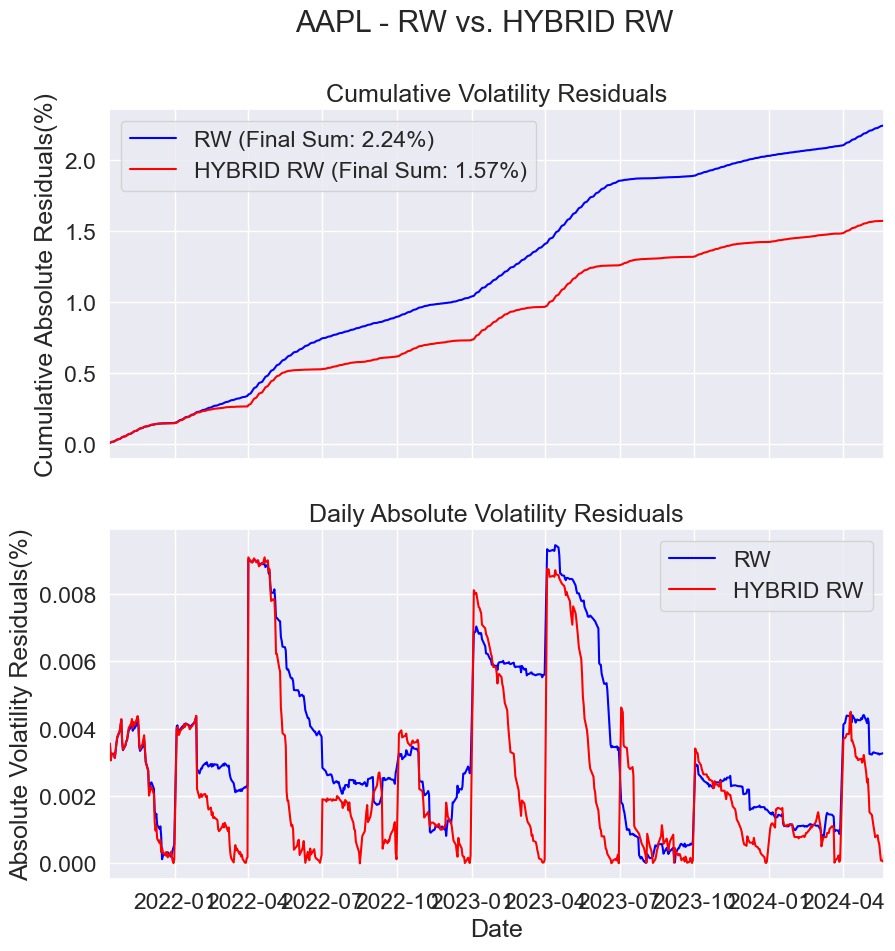

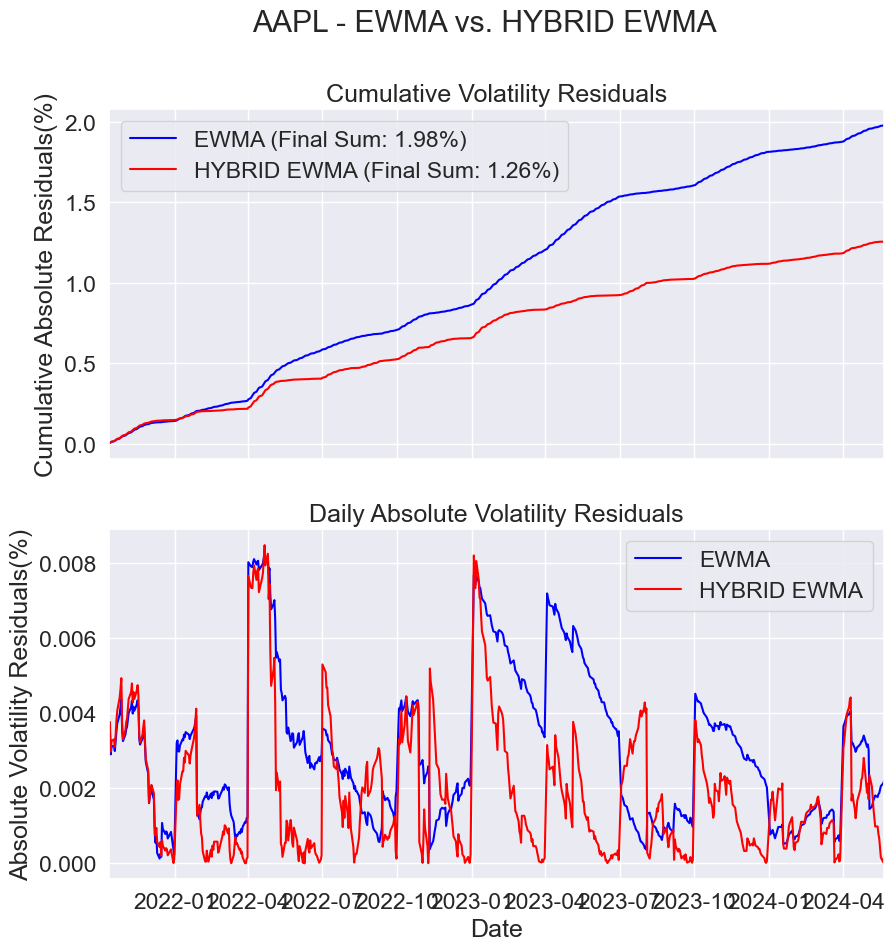

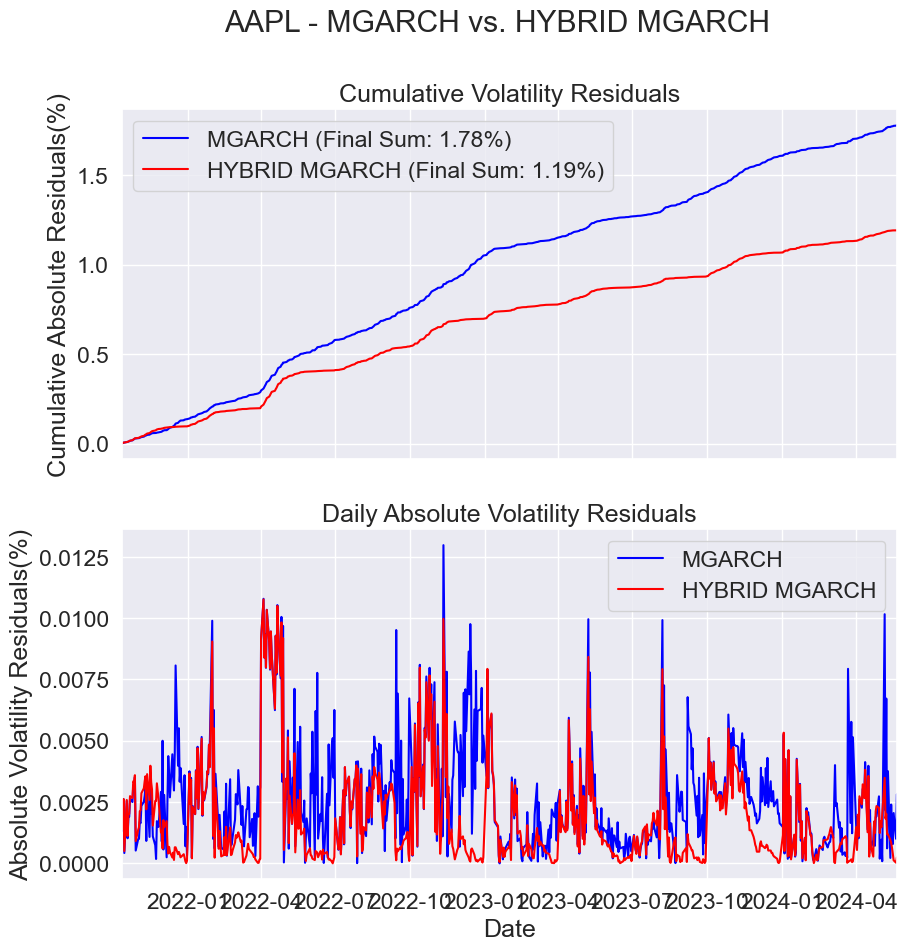

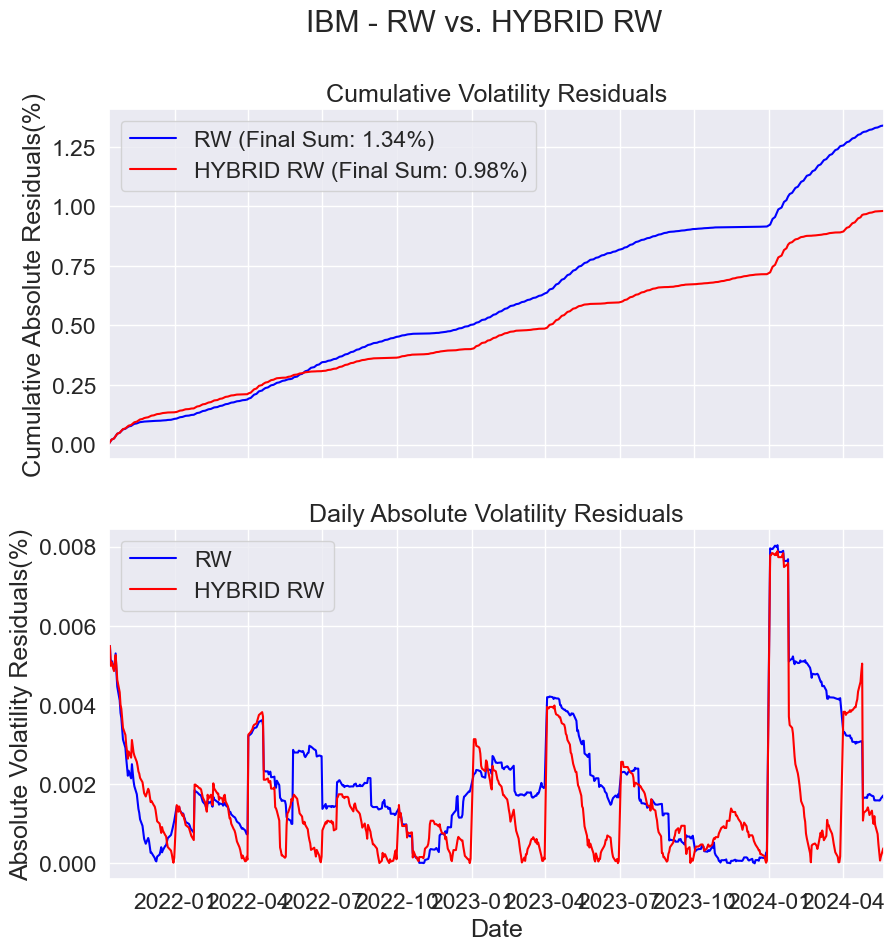

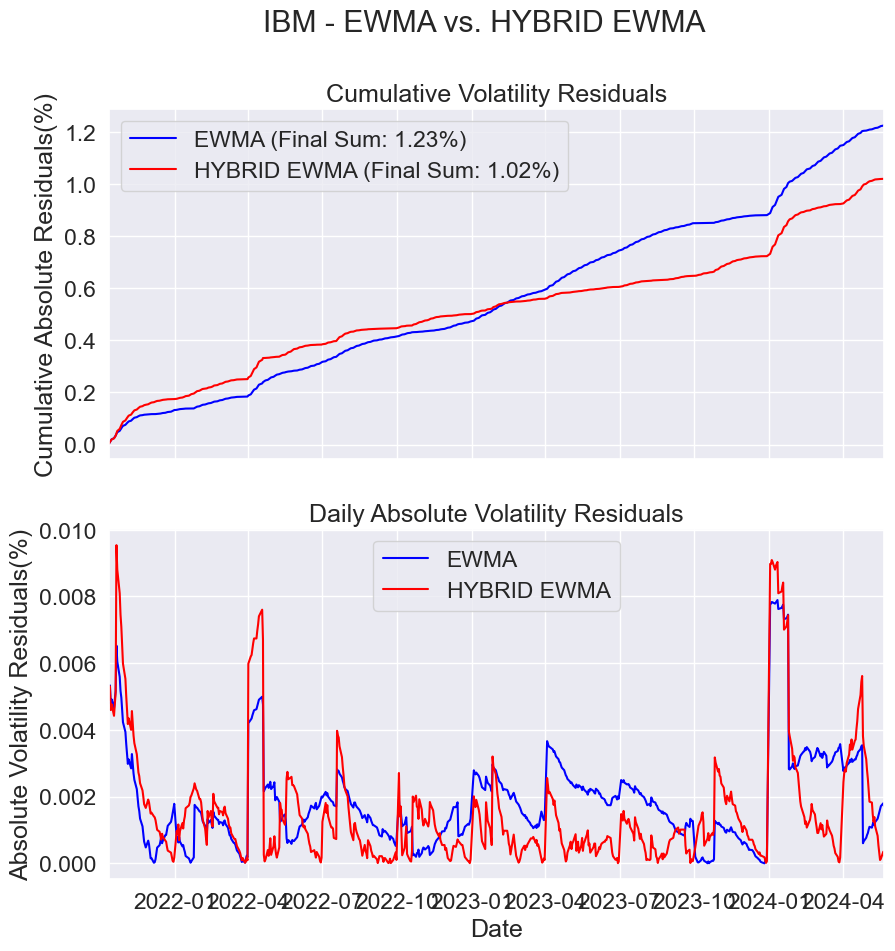

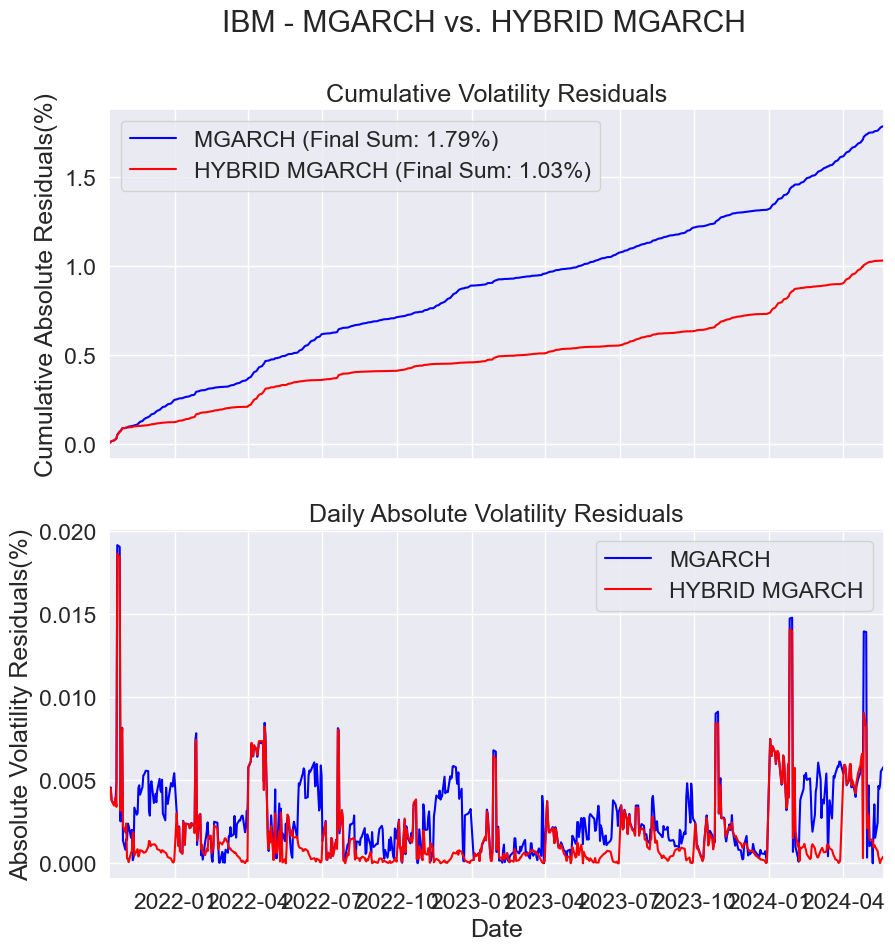

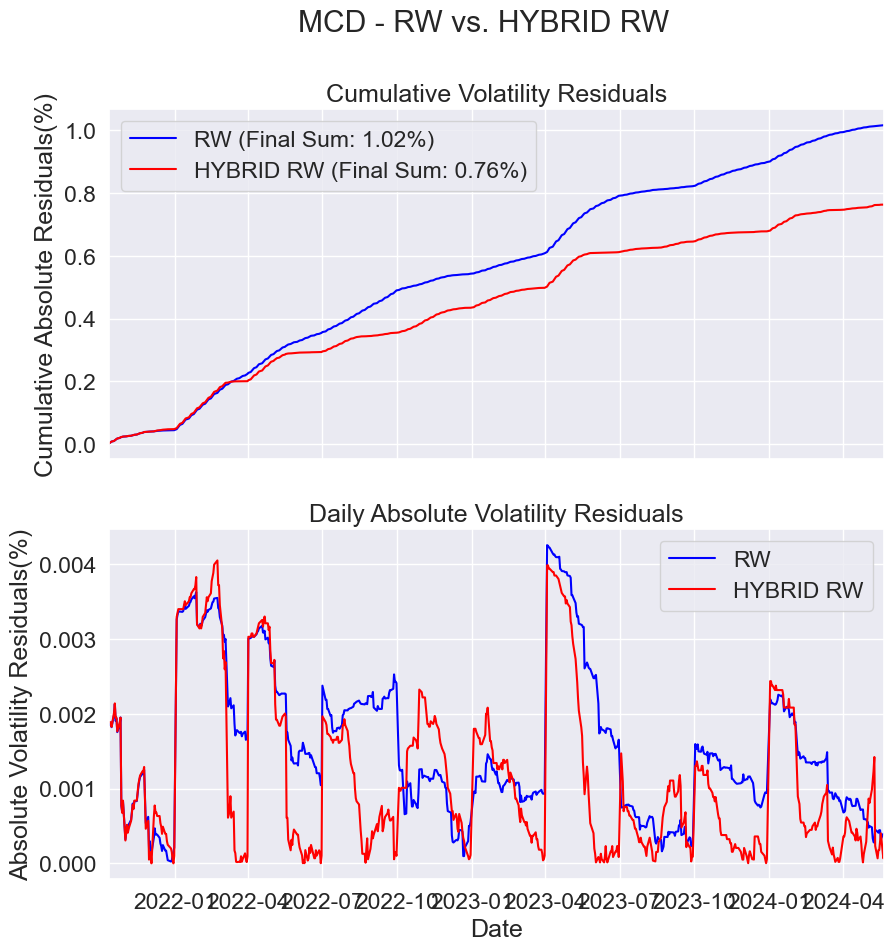

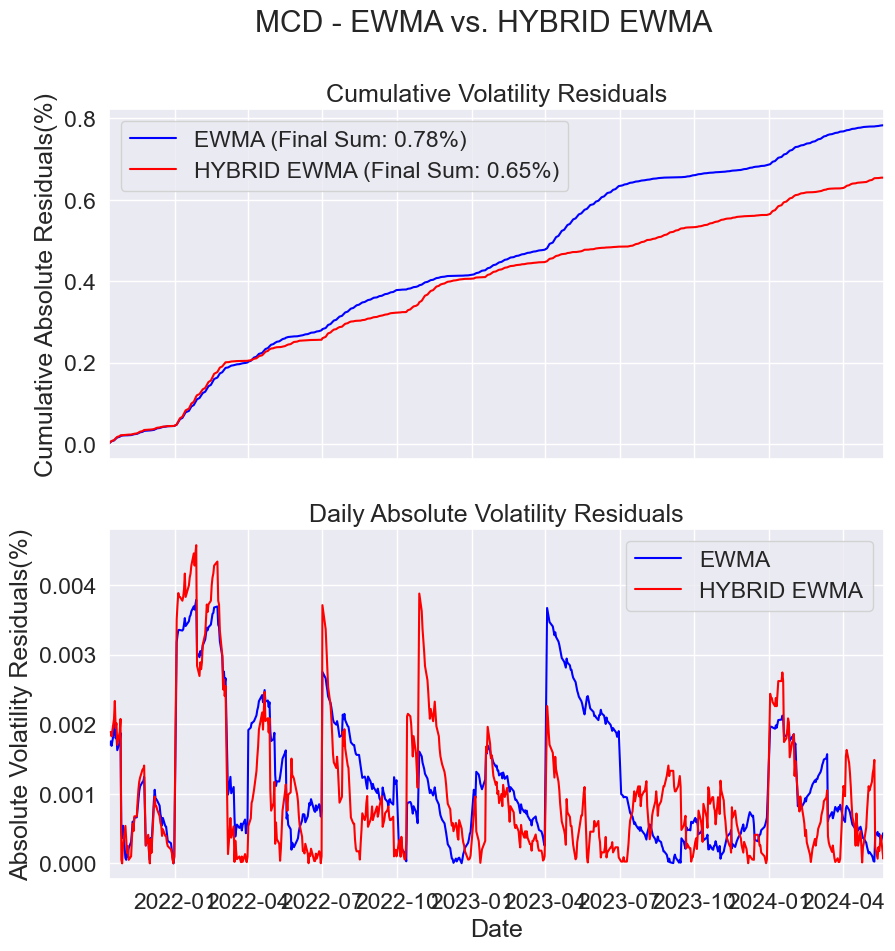

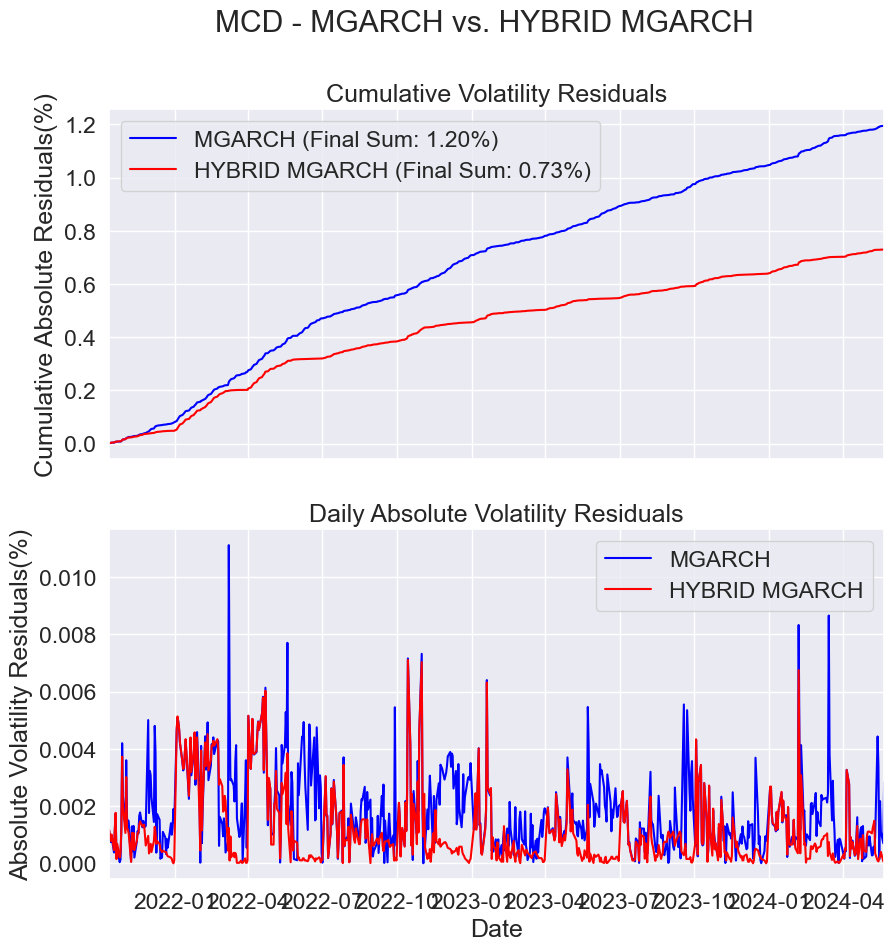

In [ ]:
# calculate the volatility residual for every predictor and for every asset

# AAPL
# Calculate the residuals
rw_residuals_AAPL = {key: real_volatilities["AAPL"][key] - rw_volatilities["AAPL"][key] for key in rw_volatilities["AAPL"]}
ewma_residuals_AAPL = {key: real_volatilities["AAPL"][key] - ewma_volatilities["AAPL"][key] for key in ewma_volatilities["AAPL"]}
mgarch_residuals_AAPL = {key: real_volatilities["AAPL"][key] - mgarch_volatilities["AAPL"][key] for key in mgarch_volatilities["AAPL"]}
hybrid_rw_residuals_AAPL = {key: real_volatilities["AAPL"][key] - hybrid_rw_volatilities["AAPL"][key] for key in hybrid_rw_volatilities["AAPL"]}
hybrid_ewma_residuals_AAPL = {key: real_volatilities["AAPL"][key] - hybrid_ewma_volatilities["AAPL"][key] for key in hybrid_ewma_volatilities["AAPL"]}
hybrid_mgarch_residuals_AAPL = {key: real_volatilities["AAPL"][key] - hybrid_mgarch_volatilities["AAPL"][key] for key in hybrid_mgarch_volatilities["AAPL"]}

# IBM
rw_residuals_IBM = {key: real_volatilities["IBM"][key] - rw_volatilities["IBM"][key] for key in rw_volatilities["IBM"]}
ewma_residuals_IBM = {key: real_volatilities["IBM"][key] - ewma_volatilities["IBM"][key] for key in ewma_volatilities["IBM"]}
mgarch_residuals_IBM = {key: real_volatilities["IBM"][key] - mgarch_volatilities["IBM"][key] for key in mgarch_volatilities["IBM"]}
hybrid_rw_residuals_IBM = {key: real_volatilities["IBM"][key] - hybrid_rw_volatilities["IBM"][key] for key in hybrid_rw_volatilities["IBM"]}
hybrid_ewma_residuals_IBM = {key: real_volatilities["IBM"][key] - hybrid_ewma_volatilities["IBM"][key] for key in hybrid_ewma_volatilities["IBM"]}
hybrid_mgarch_residuals_IBM = {key: real_volatilities["IBM"][key] - hybrid_mgarch_volatilities["IBM"][key] for key in hybrid_mgarch_volatilities["IBM"]}

# MCD
rw_residuals_MCD = {key: real_volatilities["MCD"][key] - rw_volatilities["MCD"][key] for key in rw_volatilities["MCD"]}
ewma_residuals_MCD = {key: real_volatilities["MCD"][key] - ewma_volatilities["MCD"][key] for key in ewma_volatilities["MCD"]}
mgarch_residuals_MCD = {key: real_volatilities["MCD"][key] - mgarch_volatilities["MCD"][key] for key in mgarch_volatilities["MCD"]}
hybrid_rw_residuals_MCD = {key: real_volatilities["MCD"][key] - hybrid_rw_volatilities["MCD"][key] for key in hybrid_rw_volatilities["MCD"]}
hybrid_ewma_residuals_MCD = {key: real_volatilities["MCD"][key] - hybrid_ewma_volatilities["MCD"][key] for key in hybrid_ewma_volatilities["MCD"]}
hybrid_mgarch_residuals_MCD = {key: real_volatilities["MCD"][key] - hybrid_mgarch_volatilities["MCD"][key] for key in hybrid_mgarch_volatilities["MCD"]}


# calculate the absolute residuals for every predictor and for every asset, and the sum of the residuals

# AAPL
abs_rw_residuals_AAPL = pd.Series(rw_residuals_AAPL).abs()
sum_rw_residuals_AAPL = abs_rw_residuals_AAPL.sum()

abs_ewma_residuals_AAPL = pd.Series(ewma_residuals_AAPL).abs()
sum_ewma_residuals_AAPL = abs_ewma_residuals_AAPL.sum()

abs_mgarch_residuals_AAPL = pd.Series(mgarch_residuals_AAPL).abs()
sum_mgarch_residuals_AAPL = abs_mgarch_residuals_AAPL.sum()

abs_hybrid_rw_residuals_AAPL = pd.Series(hybrid_rw_residuals_AAPL).abs()
sum_hybrid_rw_residuals_AAPL = abs_hybrid_rw_residuals_AAPL.sum()

abs_hybrid_ewma_residuals_AAPL = pd.Series(hybrid_ewma_residuals_AAPL).abs()
sum_hybrid_ewma_residuals_AAPL = abs_hybrid_ewma_residuals_AAPL.sum()

abs_hybrid_mgarch_residuals_AAPL = pd.Series(hybrid_mgarch_residuals_AAPL).abs()
sum_hybrid_mgarch_residuals_AAPL = abs_hybrid_mgarch_residuals_AAPL.sum()

# IBM
abs_rw_residuals_IBM = pd.Series(rw_residuals_IBM).abs()
sum_rw_residuals_IBM = abs_rw_residuals_IBM.sum()

abs_ewma_residuals_IBM = pd.Series(ewma_residuals_IBM).abs()
sum_ewma_residuals_IBM = abs_ewma_residuals_IBM.sum()

abs_mgarch_residuals_IBM = pd.Series(mgarch_residuals_IBM).abs()
sum_mgarch_residuals_IBM = abs_mgarch_residuals_IBM.sum()

abs_hybrid_rw_residuals_IBM = pd.Series(hybrid_rw_residuals_IBM).abs()
sum_hybrid_rw_residuals_IBM = abs_hybrid_rw_residuals_IBM.sum()

abs_hybrid_ewma_residuals_IBM = pd.Series(hybrid_ewma_residuals_IBM).abs()
sum_hybrid_ewma_residuals_IBM = abs_hybrid_ewma_residuals_IBM.sum()

abs_hybrid_mgarch_residuals_IBM = pd.Series(hybrid_mgarch_residuals_IBM).abs()
sum_hybrid_mgarch_residuals_IBM = abs_hybrid_mgarch_residuals_IBM.sum()

# MCD
abs_rw_residuals_MCD = pd.Series(rw_residuals_MCD).abs()
sum_rw_residuals_MCD = abs_rw_residuals_MCD.sum()

abs_ewma_residuals_MCD = pd.Series(ewma_residuals_MCD).abs()
sum_ewma_residuals_MCD = abs_ewma_residuals_MCD.sum()

abs_mgarch_residuals_MCD = pd.Series(mgarch_residuals_MCD).abs()
sum_mgarch_residuals_MCD = abs_mgarch_residuals_MCD.sum()

abs_hybrid_rw_residuals_MCD = pd.Series(hybrid_rw_residuals_MCD).abs()
sum_hybrid_rw_residuals_MCD = abs_hybrid_rw_residuals_MCD.sum()

abs_hybrid_ewma_residuals_MCD = pd.Series(hybrid_ewma_residuals_MCD).abs()
sum_hybrid_ewma_residuals_MCD = abs_hybrid_ewma_residuals_MCD.sum()

abs_hybrid_mgarch_residuals_MCD = pd.Series(hybrid_mgarch_residuals_MCD).abs()
sum_hybrid_mgarch_residuals_MCD = abs_hybrid_mgarch_residuals_MCD.sum()


# plot the residuals

# Titles for each column "AAPL,IBM,MCD,KO,PEP,JNJ,ORCL,PFE,WMT"
assets = ['AAPL', 'IBM', 'MCD']
predictors = ['RW', 'EWMA', 'MGARCH']
hybrids = ['HYBRID RW', 'HYBRID EWMA', 'HYBRID MGARCH']

# Loop through each asset and plot each type of predictor comparison
for i, asset in enumerate(assets):
    for j, (predictor, hybrid) in enumerate(zip(predictors, hybrids)):
        # Prepare the figure for each comparison
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
        fig.suptitle(f'{asset} - {predictor} vs. {hybrid}')

        # Get absolute residuals for predictor and hybrid
        abs_pred = pd.Series(globals()[f'abs_{predictor.lower()}_residuals_{asset}'])
        abs_hybrid = pd.Series(globals()[f'abs_hybrid_{predictor.lower()}_residuals_{asset}'])

        # Calculate cumulative sums for predictor and hybrid
        cumsum_pred = abs_pred.cumsum()
        cumsum_hybrid = abs_hybrid.cumsum()

        # Plotting the cumulative residuals on the upper subplot
        ax1.plot(cumsum_pred, label=f'{predictor} (Final Sum: {cumsum_pred.iloc[-1]:.2f}%)', color='blue')
        ax1.plot(cumsum_hybrid, label=f'{hybrid} (Final Sum: {cumsum_hybrid.iloc[-1]:.2f}%)', color='red')
        ax1.set_title('Cumulative Volatility Residuals')
        ax1.legend()
        ax1.set_ylabel('Cumulative Absolute Residuals(%)')
        ax1.grid(True)
        # Remove dates from the x-axis
        ax1.set_xticklabels([])  # This removes the x-axis labels
        ax1.set_xlim(start_date, end_date)

        # Plotting the daily absolute residuals on the lower subplot
        ax2.plot(abs_pred, label=f'{predictor}', color='blue')
        ax2.plot(abs_hybrid, label=f'{hybrid}', color='red')
        ax2.set_title('Daily Absolute Volatility Residuals')
        ax2.legend()
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Absolute Volatility Residuals(%)')
        ax2.grid(True)
        ax2.set_xlim(start_date, end_date)

        # Show each plot
        plt.show()

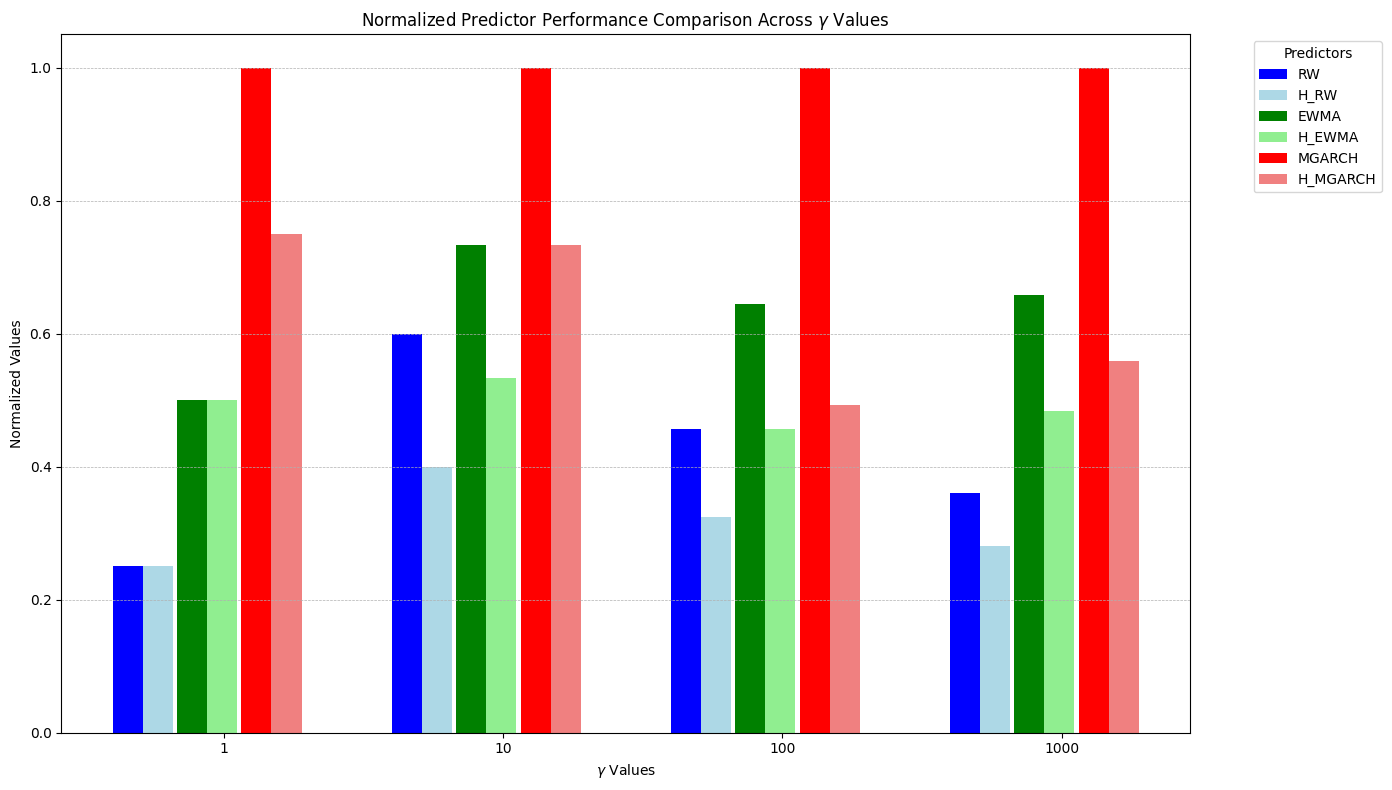

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

'''
gamma = 10000 -> [243.48, 216.68, 358.76, 293.44, 493.15, 323.49]
gamma = 1000  -> [24.28, 21.25, 35.55, 28.94, 48.49, 31.77]
gamma = 100   -> [3.22, 2.67, 4.00, 3.22, 5.47, 3.37]
gamma = 10    -> [0.15, 0.12, 0.17, 0.14, 0.21, 0.17]
gamma = 1     -> [0.00, 0.00, 0.01, 0.01, 0.03, 0.02]
'''


# Data - Reorder gamma values from 1 to 1000
gammas = [1, 10, 100, 1000]  # Reordered to start from 1
data = {
    'RW': [0.00, 0.15, 3.22, 24.28],  # Data reordered to match new gamma order
    'H_RW': [0.00, 0.12, 2.67, 21.25],
    'EWMA': [0.01, 0.17, 4.00, 35.55],
    'H_EWMA': [0.01, 0.14, 3.22, 28.94],
    'MGARCH': [0.03, 0.21, 5.47, 48.49],
    'H_MGARCH': [0.02, 0.17, 3.37, 31.77],
}


# Specific max and min values for each gamma group
gamma_max_values = {1000: 48.49, 100: 5.47, 10: 0.21, 1: 0.03}
gamma_min_values = {1000: 10.62, 100: 1.33, 10: 0.06, 1: -0.01}

# Normalize data for each gamma
normalized_data = {}
for key in data:
    normalized_data[key] = []
    for index, gamma in enumerate(gammas):
        max_val = gamma_max_values[gamma]
        min_val = gamma_min_values[gamma]
        normalized_value = (data[key][index] - min_val) / (max_val - min_val) if max_val > min_val else 0
        normalized_data[key].append(normalized_value)

data = normalized_data

# Configuration for the plot
n_groups = len(gammas)  # Number of gamma groups
predictor_keys = ['RW', 'H_RW', 'EWMA', 'H_EWMA', 'MGARCH', 'H_MGARCH']  # Ensure consistent order

bar_width = 0.35  # Width of the bars
gap_between_pairs = 0.05  # Very small gap between each pair and the next pair

# Calculate positions
group_width = bar_width * 2 + gap_between_pairs
total_width = group_width * (len(predictor_keys) // 2)
offsets = np.linspace(0, total_width - group_width, len(predictor_keys) // 2)

# Define colors consistently
colors = ['blue', 'lightblue', 'green', 'lightgreen', 'red', 'lightcoral']

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']
mpl.rcParams['font.size'] = 36
mpl.rcParams['figure.figsize'] = [14, 8]

# Disable default style
plt.style.use('default')

# Prepare figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Generate the bars
for gamma_index, gamma in enumerate(gammas):
    base_position = gamma_index * (total_width + 1)  # Add gap between different gamma sets
    for i, key in enumerate(predictor_keys):
        color = colors[i]  # Consistent color assignment
        position = base_position + offsets[i // 2] + (i % 2) * bar_width
        ax.bar(position, data[key][gamma_index], bar_width, label=key if gamma_index == 0 else "", color=color)

# Setting chart titles and labels
ax.set_xlabel(r'$\gamma$ Values')
ax.set_ylabel('Normalized Values')
ax.set_title(r'Normalized Predictor Performance Comparison Across $\gamma$ Values')

# Setting the x-ticks to be in the middle of each group
xtick_positions = np.arange(0, len(gammas) * (total_width + 1), total_width + 1) + total_width / 2
ax.set_xticks(xtick_positions)
ax.set_xticklabels([f'{g}' for g in gammas])

# Adding a legend, only once for each type
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title="Predictors", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for better readability
ax.grid(linestyle='--', linewidth=0.5, axis='y')

# Show the plot
plt.tight_layout()
plt.show()

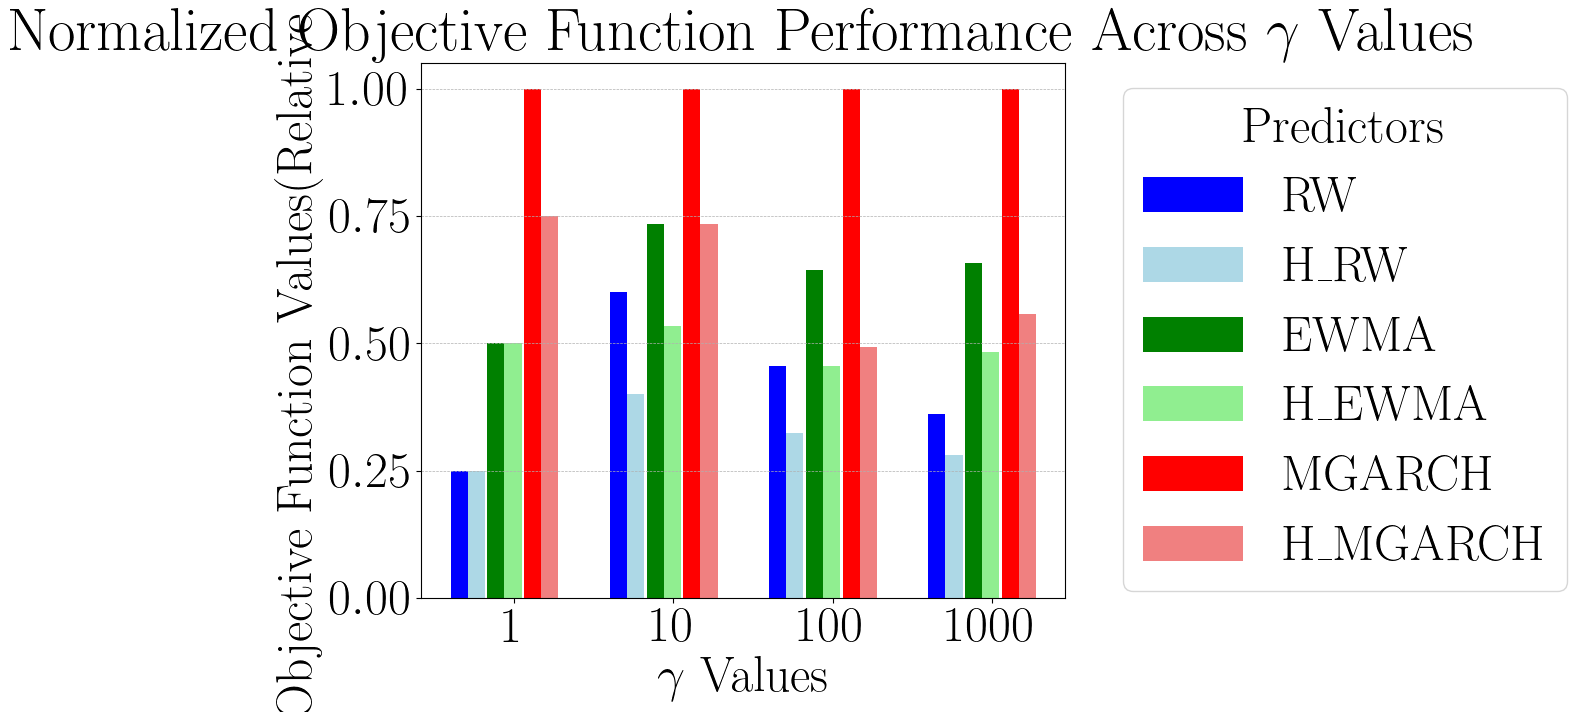

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


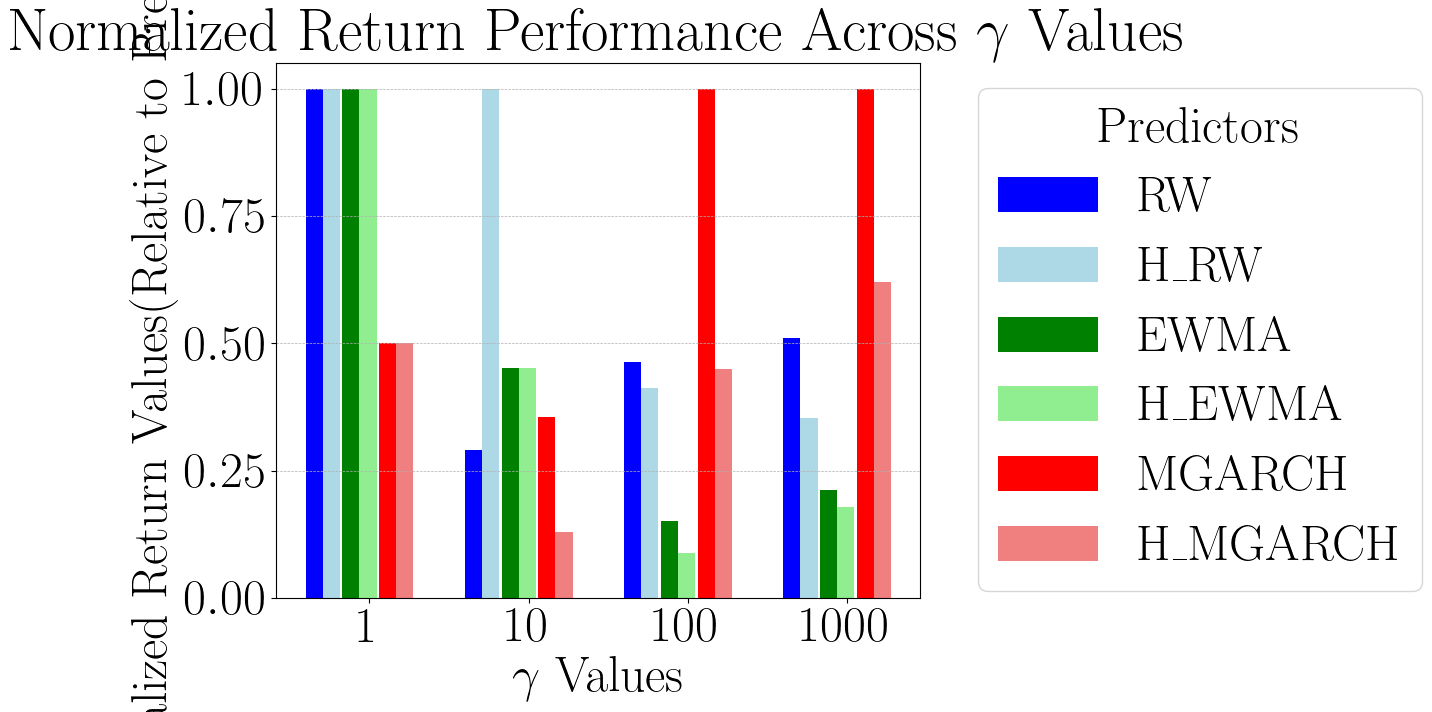

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


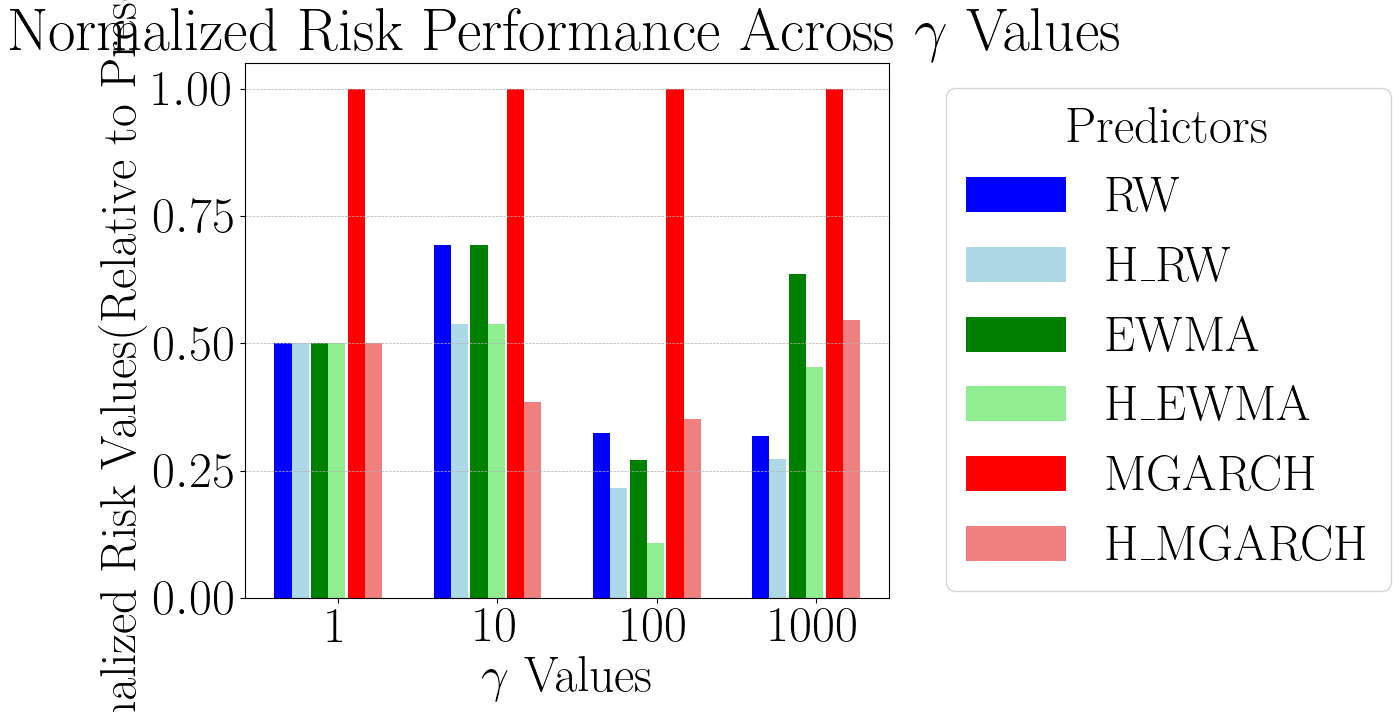

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
partialPath = "C:\\Users\\chiod\\Downloads\\"

'''
gamma = 1000  -> [24.28, 21.25, 35.55, 28.94, 48.49, 31.77]
gamma = 100   -> [3.22, 2.67, 4.00, 3.22, 5.47, 3.37]
gamma = 10    -> [0.15, 0.12, 0.17, 0.14, 0.21, 0.17]
gamma = 1     -> [0.00, 0.00, 0.01, 0.01, 0.03, 0.02]
'''

gammas = [1, 10, 100, 1000]  

# objecive function values for each predictor(for min risk max return optimization problem)
objFunctionValuesdata = {
    'RW': [0.00, 0.15, 3.22, 24.28],  
    'H_RW': [0.00, 0.12, 2.67, 21.25],
    'EWMA': [0.01, 0.17, 4.00, 35.55],
    'H_EWMA': [0.01, 0.14, 3.22, 28.94],
    'MGARCH': [0.03, 0.21, 5.47, 48.49],
    'H_MGARCH': [0.02, 0.17, 3.37, 31.77],
}

# return values for each predictor(for min risk max return optimization problem)
returnValuesdata = {
    'RW': [0.00, -0.06, 1.87, 0.18],
    'H_RW': [0.00, 0.16, 1.50, -0.49],
    'EWMA': [0.00, -0.01, -0.40, -1.09],
    'H_EWMA': [0.00, -0.01, -0.86, -1.24],
    'MGARCH': [-0.01, -0.04, 5.76, 2.27],
    'H_MGARCH': [-0.01, -0.11, 1.77, 0.65],
}

#risk values for each predictor(for min risk max return optimization problem)
riskValuesdata = {
    'RW': [0.00, 0.06, 0.22, 0.13],
    'H_RW': [0.00, 0.05, 0.18, 0.12],
    'EWMA': [0.00, 0.06, 0.20, 0.20],
    'H_EWMA': [0.00, 0.05, 0.14, 0.16],
    'MGARCH': [0.01, 0.08, 0.47, 0.28],
    'H_MGARCH': [0.00, 0.04, 0.23, 0.18],
}

# Specific max and min values for each gamma group
gamma_max_values_objFunction = {1000: 48.49, 100: 5.47, 10: 0.21, 1: 0.03}
gamma_min_values_objFunction = {1000: 10.62, 100: 1.33, 10: 0.06, 1: -0.01}

gamma_max_values_return = {1000: 2.27, 100: 5.76, 10: 0.16, 1: 0.00}
gamma_min_values_return = {1000: -2, 100: -1.5, 10: -0.15, 1: -0.02}

gamma_max_values_risk = {1000: 0.28, 100: 0.47, 10: 0.08, 1: 0.01}
gamma_min_values_risk = {1000: 0.06, 100: 0.10, 10: 0.015, 1:-0.01}

# Function to normalize data
def normalize_data(data, max_values, min_values):
    normalized_data = {}
    for key in data:
        normalized_data[key] = []
        for index, gamma in enumerate(gammas):
            max_val = max_values[gamma]
            min_val = min_values[gamma]
            normalized_value = (data[key][index] - min_val) / (max_val - min_val) if max_val > min_val else 0
            normalized_data[key].append(normalized_value)
    return normalized_data

# Function to plot data
def plot_data(data, title, partialPath, file_name, metric_name):
    # Configuration for the plot
    n_groups = len(gammas)
    predictor_keys = ['RW', 'H_RW', 'EWMA', 'H_EWMA', 'MGARCH', 'H_MGARCH']
    bar_width = 0.35
    gap_between_pairs = 0.05
    group_width = bar_width * 2 + gap_between_pairs
    total_width = group_width * (len(predictor_keys) // 2)
    offsets = np.linspace(0, total_width - group_width, len(predictor_keys) // 2)
    colors = ['blue', 'lightblue', 'green', 'lightgreen', 'red', 'lightcoral']
    
    # Disable default style
    plt.style.use('default')
    
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']
    mpl.rcParams['font.size'] = 36
    mpl.rcParams['figure.figsize'] = [14, 8]

    # Prepare figure and axes
    fig, ax = plt.subplots(figsize=(14, 8))

    # Generate the bars
    for gamma_index, gamma in enumerate(gammas):
        base_position = gamma_index * (total_width + 1)
        for i, key in enumerate(predictor_keys):
            color = colors[i]
            position = base_position + offsets[i // 2] + (i % 2) * bar_width
            ax.bar(position, data[key][gamma_index], bar_width, label=key if gamma_index == 0 else "", color=color)

    # Setting chart titles and labels
    ax.set_xlabel('$\gamma$ Values')
    ax.set_ylabel(f'Normalized {metric_name} Values(Relative to Prescient)[-]')
    ax.set_title(title)

    xtick_positions = np.arange(0, len(gammas) * (total_width + 1), total_width + 1) + total_width / 2
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels([rf'{g}' for g in gammas])

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), title="Predictors", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(linestyle='--', linewidth=0.5, axis='y')
    plt.tight_layout()
    plt.show()

    fig.savefig(partialPath + file_name, format='eps', bbox_inches='tight')

# Normalize data for each category and plot
normalized_objFunction = normalize_data(objFunctionValuesdata, gamma_max_values_objFunction, gamma_min_values_objFunction)
normalized_returns = normalize_data(returnValuesdata, gamma_max_values_return, gamma_min_values_return)
normalized_risks = normalize_data(riskValuesdata, gamma_max_values_risk, gamma_min_values_risk)

# Plotting each category
plot_data(normalized_objFunction, r'Normalized Objective Function Across $\gamma$ Values', partialPath , 'normalized_objFunction_performance.eps', 'Objective Function')
plot_data(normalized_returns, r'Normalized Return Across $\gamma$ Values', partialPath, 'normalized_return_performance.eps', 'Return')
plot_data(normalized_risks, r'Normalized Risk Across $\gamma$ Values', partialPath, 'normalized_risk_performance.eps', "Risk")